## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...



### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [1]:
import json

with open('data/hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


adjacency_dict = {}

for node in data["nodes"]:
    user = node[0]
    if user not in adjacency_dict:
        adjacency_dict[user] = {}

for edge in data["edges"]:
    user1, user2, weight = edge
    adjacency_dict[user1][user2] = weight
    adjacency_dict[user2][user1] = weight 


friends = {user: list(adjacency_dict[user].keys()) for user in adjacency_dict}


print("邻接字典表示：", json.dumps(adjacency_dict, indent=4))
print("每个用户的直接朋友：", friends)


邻接字典表示： {
    "Yanyan-Wang": {
        "Aarebecca": 25.3,
        "pomelo-nwu": 25.09,
        "yangzy0603": 11.85,
        "tyn1998": 9.62,
        "yvonneyx": 7.39,
        "lidongze0629": 7.25,
        "RackweLLizm": 4.5,
        "yikenie": 4.25,
        "yubo0923": 3.61,
        "Maple0817": 3.11,
        "wj23027": 2.34,
        "frank-zsy": 2.1,
        "andyhuang18": 1.14,
        "bifenglin": 0.86
    },
    "Aarebecca": {
        "Yanyan-Wang": 25.3,
        "pomelo-nwu": 24.84,
        "yangzy0603": 11.92,
        "yvonneyx": 7.73,
        "lidongze0629": 6.58,
        "tyn1998": 6.4,
        "RackweLLizm": 4.84,
        "yikenie": 4.55,
        "yubo0923": 3.82,
        "Maple0817": 3.27,
        "frank-zsy": 0.97
    },
    "pomelo-nwu": {
        "Yanyan-Wang": 25.09,
        "Aarebecca": 24.84,
        "yangzy0603": 13.85,
        "tyn1998": 12.48,
        "lidongze0629": 8.1,
        "yvonneyx": 7.63,
        "RackweLLizm": 4.97,
        "yikenie": 4.66,
        "bifengl

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。


In [2]:
import json

with open('data/hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

adjacency_dict = {}
influence_dict = {}

for node in data["nodes"]:
    user, influence = node
    influence_dict[user] = influence
    if user not in adjacency_dict:
        adjacency_dict[user] = {}

for edge in data["edges"]:
    user1, user2, weight = edge
    adjacency_dict[user1][user2] = weight
    adjacency_dict[user2][user1] = weight  

degree_centrality = {user: len(friends) for user, friends in adjacency_dict.items()}
top_5_degree_users = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

top_5_influential_users = sorted(influence_dict.items(), key=lambda x: x[1], reverse=True)[:5]

weighted_influence = {}
for user in adjacency_dict:
    degree_score = degree_centrality.get(user, 0)
    influence_score = influence_dict.get(user, 0)
    weighted_influence[user] = 0.5 * degree_score + 0.5 * influence_score


top_5_weighted_influence_users = sorted(weighted_influence.items(), key=lambda x: x[1], reverse=True)[:5]


print("度数最高的前5个用户及其朋友数量:", top_5_degree_users)
print("影响力得分最高的前5个用户:", top_5_influential_users)
print("综合影响力最高的前5个用户:", top_5_weighted_influence_users)


度数最高的前5个用户及其朋友数量: [('tyn1998', 30), ('frank-zsy', 30), ('pomelo-nwu', 24), ('andyhuang18', 23), ('wj23027', 23)]
影响力得分最高的前5个用户: [('Yanyan-Wang', 50.95), ('Aarebecca', 23.82), ('pomelo-nwu', 22.36), ('tyn1998', 16.64), ('frank-zsy', 15.8)]
综合影响力最高的前5个用户: [('Yanyan-Wang', 32.475), ('tyn1998', 23.32), ('pomelo-nwu', 23.18), ('frank-zsy', 22.9), ('Aarebecca', 17.41)]


#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。

In [3]:
import json
from collections import Counter


with open('data/hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


adjacency_dict = {}
influence_dict = {}


for node in data["nodes"]:
    user, influence = node
    influence_dict[user] = influence
    if user not in adjacency_dict:
        adjacency_dict[user] = {}

for edge in data["edges"]:
    user1, user2, weight = edge
    adjacency_dict[user1][user2] = weight
    adjacency_dict[user2][user1] = weight 


target_user = "Yanyan-Wang"
direct_friends = set(adjacency_dict.get(target_user, {}))
friends_of_friends = Counter()


for friend in direct_friends:
    for fof in adjacency_dict.get(friend, {}):
        if fof != target_user and fof not in direct_friends:
            friends_of_friends[fof] += 1

recommended_friends = friends_of_friends.most_common()


strength_connections = {}
for user, weight in adjacency_dict.get(target_user, {}).items():
    strength_connections[user] = weight


for friend in direct_friends:
    for fof, weight in adjacency_dict.get(friend, {}).items():
        if fof != target_user and fof not in strength_connections:
            strength_connections[fof] = weight


top_5_connections = sorted(strength_connections.items(), key=lambda x: x[1], reverse=True)[:5]


print("推荐的'朋友的朋友':")
for fof, count in recommended_friends:
    print(f" {fof} - 共同朋友数量：{count}")

print("\n连接强度最高的前5个用户:")
for user, strength in top_5_connections:
    print(f" {user} - 连接强度：{strength}")


推荐的'朋友的朋友':
 Zzzzzhuzhiwei - 共同朋友数量：6
 xgdyp - 共同朋友数量：6
 will-ww - 共同朋友数量：6
 PureNatural - 共同朋友数量：6
 birdflyi - 共同朋友数量：6
 lhbvvvvv - 共同朋友数量：6
 zhicheng-ning - 共同朋友数量：6
 xiaoya-yaya - 共同朋友数量：6
 zhaosj975 - 共同朋友数量：6
 longyanz - 共同朋友数量：6
 stevending1st - 共同朋友数量：5
 wxharry - 共同朋友数量：4
 pranavshuklaa - 共同朋友数量：4
 stealth-bombeer - 共同朋友数量：4
 kunal8411 - 共同朋友数量：4
 Vlad116 - 共同朋友数量：4

连接强度最高的前5个用户:
 Aarebecca - 连接强度：25.3
 pomelo-nwu - 连接强度：25.09
 yangzy0603 - 连接强度：11.85
 tyn1998 - 连接强度：9.62
 Zzzzzhuzhiwei - 连接强度：9.52


#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

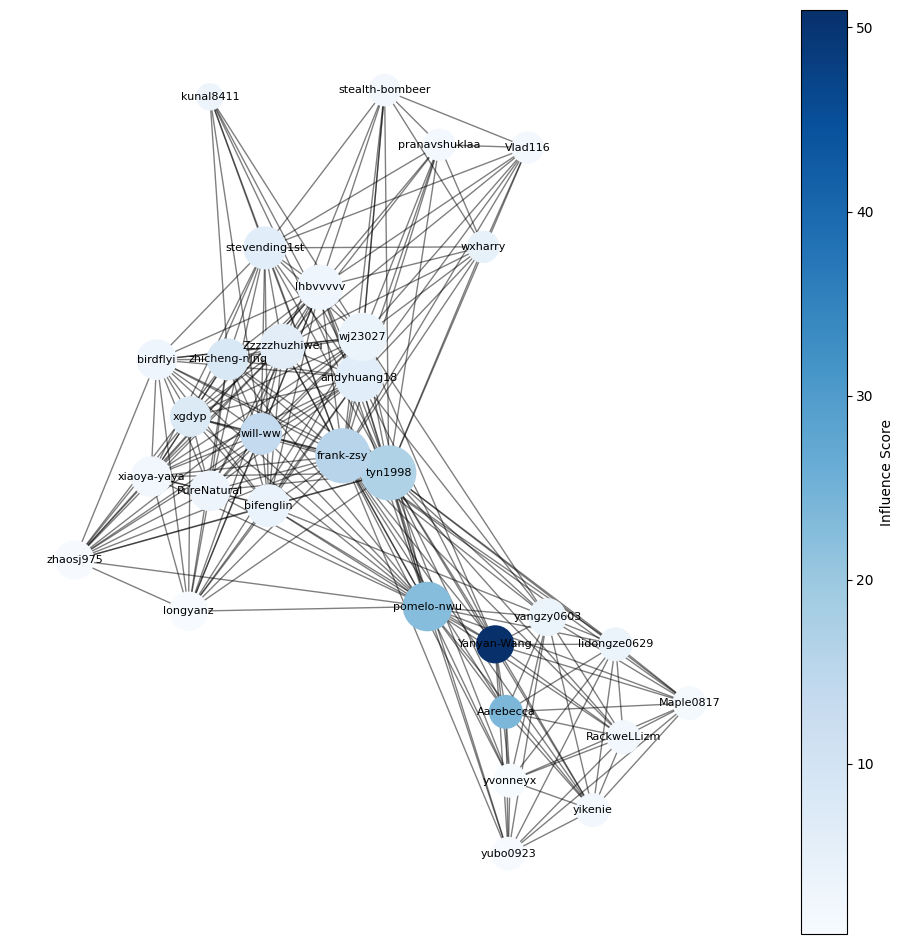

In [5]:
import json
import networkx as nx
import matplotlib.pyplot as plt


with open('data/hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


G = nx.Graph()

for node in data["nodes"]:
    user, influence = node
    G.add_node(user, influence=influence)

for edge in data["edges"]:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

influence_scores = nx.get_node_attributes(G, 'influence')
degrees = dict(G.degree())
colors = [influence_scores[node] for node in G.nodes()]
sizes = [degrees[node] * 50 for node in G.nodes()] 


plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  


nodes = nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=sizes, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")


plt.colorbar(nodes, label="Influence Score")


plt.axis("off")
plt.show()


位于社交网络图中自己的圈越大，颜色越深的用户最具有影响力，比如：pomelo-nwu,tyn1998,frank-zsy,Yanyan-Wang等